# Lesson9 深层神经网络

## 一、异或门问题

In [1]:
import numpy as np

In [2]:
#————————————————————————————回顾Lesson8的andgate————————————————————————————
import torch
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype = torch.float32)
andgate = torch.tensor([0,0,0,1], dtype = torch.float32)
#定义w
w = torch.tensor([-0.2,0.15,0.15], dtype = torch.float32)


In [3]:
def LogisticR(X,w):
    zhat = torch.mv(X,w)
    sigma = torch.sigmoid(zhat)
    andhat = torch.tensor([int(x) for x in sigma >= 0.5],dtype=torch.float32)
    return sigma,andhat

In [4]:
    
sigma, andhat = LogisticR(X,w)
sigma
andhat
andgate
andgate == andhat

tensor([True, True, True, True])

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


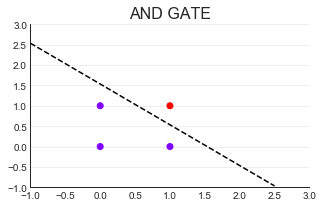

In [6]:
#————————————————————————————绘图————————————————————————————


# 横坐标为x1，纵坐标为x2

# 设置一个画布
plt.style.use('seaborn-whitegrid') #设置图像的风格
sns.set_style("white")
plt.figure(figsize=(5,3)) #设置画布大小
plt.title("AND GATE",fontsize=16) #设置图像标题

plt.scatter(X[:,1],X[:,2],c=andgate,cmap="rainbow") #绘制散点图

plt.xlim(-1,3) #设置横纵坐标尺寸
plt.ylim(-1,3)
plt.grid(alpha=.4,axis="y") #显示背景中的网格
plt.gca().spines["top"].set_alpha(.0) #让上方和右侧的坐标轴被隐藏
plt.gca().spines["right"].set_alpha(.0);


# 绘制分割线
x = np.arange(-1,3,0.5)
plt.plot(x,(0.23-0.15*x)/0.15 #这里是从直线的表达式变型出的x2 = 的式子
         ,color="k",linestyle="--")


让我们使用阶跃函数作为线性结果z之后的函数，

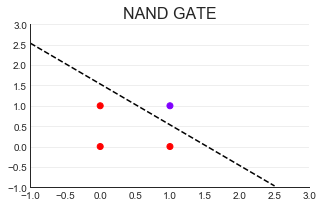

In [7]:
#————————————————————————————NAND与非门的图形————————————————————————————
#非与门、非与门的图像
nandgate = torch.tensor([1,1,1,0], dtype = torch.float32)
def NAND(X):
    w = torch.tensor([0.23,-0.15,-0.15], dtype = torch.float32) #和与门、或门都不同的权重
    zhat = torch.mv(X,w)
    yhat = torch.tensor([int(x) for x in zhat >= 0],dtype=torch.float32)
    return yhat
NAND(X)
#图像
x = np.arange(-1,3,0.5)
plt.figure(figsize=(5,3))
plt.title("NAND GATE",fontsize=16)
plt.scatter(X[:,1],X[:,2],c=nandgate,cmap="rainbow") 
plt.plot(x,(0.23-0.15*x)/0.15,color="k",linestyle="--") 
plt.xlim(-1,3) 
plt.ylim(-1,3)
plt.grid(alpha=.4,axis="y") 
plt.gca().spines["top"].set_alpha(.0) 
plt.gca().spines["right"].set_alpha(.0)

In [8]:
#————————————————————————————ORGATE（或门）————————————————————————————
X = torch.tensor([[1,0,0],[1,1,0],[1,0,1],[1,1,1]], dtype = torch.float32)
#定义或门的标签
orgate = torch.tensor([0,1,1,1], dtype = torch.float32)

def OR(X):
    w = torch.tensor([-0.08,0.15,0.15],dtype=torch.float32) #参数是给定的
    zhat = torch.mv(X,w)
    yhat = torch.tensor([int(x) for x in zhat >=0],dtype=torch.float32)
    return yhat

OR(X)

tensor([0., 1., 1., 1.])

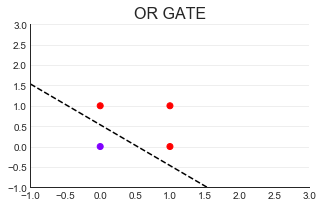

In [9]:
#————————————————————————————或门绘图————————————————————————————
#绘制直线划分散点的图像
x = np.arange(-1,3,0.5)
plt.figure(figsize=(5,3))
plt.title("OR GATE",fontsize=16)
plt.scatter(X[:,1],X[:,2],c=orgate,cmap="rainbow") 
plt.plot(x,(0.08-0.15*x)/0.15,color="k",linestyle="--") 
plt.xlim(-1,3) 
plt.ylim(-1,3)
plt.grid(alpha=.4,axis="y") 
plt.gca().spines["top"].set_alpha(.0) 
plt.gca().spines["right"].set_alpha(.0)

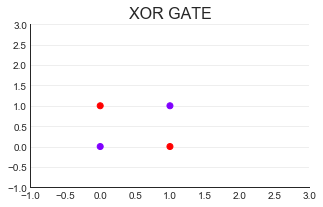

In [10]:
#————————————————————————————异或门（XORGATE）的可视化————————————————————————————

xorgate = torch.tensor([0,1,1,0], dtype = torch.float32)
plt.figure(figsize=(5,3))
plt.title("XOR GATE",fontsize=16)
plt.scatter(X[:,1],X[:,2],c=xorgate,cmap="rainbow")
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.grid(alpha=.4,axis="y")
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)

# 难以用一条直线来划分
# 那我们如何把直线的决策边界变成曲线呢？答案是将单层神经网络变成多层。

In [11]:
def XOR(X):
    #输入值：
    input_1 = X
    #中间层：
    sigma_nand = NAND(input_1)
    sigma_or = OR(input_1)
    x0 = torch.tensor([[1],[1],[1],[1]],dtype=torch.float32)
    #输出层：
    input_2 = torch.cat((x0,sigma_nand.view(4,1),sigma_or.view(4,1)),dim=1)
    y_and = AND(input_2)
    #print("NANE:",y_nand)
    #print("OR:",y_or)
    return y_and

- **深层神经网络的不可解释性**

如果神经网络的层数继续增加，或每一层上神经元数量继续增加，神经网络的嵌套和计算就会变得更加复杂。

## 二、探索多层神经网络:层 vs h(z)

因为神经元有“多进单出”的性质，可以一次性输入多个信号，但是输出只能有一个，因此输入神经元的信息必须以某种方式进行整合，否则神经元就无法将信息传递下去，而最容易的整合方式就是加和$\sum$

“层”本身不是神经网络解决非线性问题的关键，层上的激活函数$h(z)$才是。如果$h(z)$是线性函数，那么不能解决非线性问题；或$h(z)$不存在，那增加再多的层也没有用。

In [12]:
#————————————————————————————回顾XOR代码——h(z)选用恒等函数————————————————————————————

xorgate = torch.tensor([0,1,1,0],dtype=torch.float32)

def AND(X):
    w = torch.tensor([-0.2,0.15, 0.15], dtype = torch.float32)
    zhat = torch.mv(X,w)
    #下面这一行就是阶跃函数的表达式，注意AND函数是在输出层，所以保留输出层的阶跃函数g(z)
    andhat = torch.tensor([int(x) for x in zhat >= 0],dtype=torch.float32)
    return andhat

def OR(X):
    w = torch.tensor([-0.08,0.15,0.15], dtype = torch.float32) #在这里我修改了b的数值
    zhat = torch.mv(X,w)
    #注释掉阶跃函数，相当于h(z)是恒等函数
    #yhat = torch.tensor([int(x) for x in zhat >= 0],dtype=torch.float32)
    return zhat

def NAND(X):
    w = torch.tensor([0.23,-0.15,-0.15], dtype = torch.float32) 
    zhat = torch.mv(X,w)
    #注释掉阶跃函数，相当于h(z)是恒等函数
    #yhat = torch.tensor([int(x) for x in zhat >= 0],dtype=torch.float32)
    return zhat

def XOR(X):
    #输入值：
    input_1 = X
    #中间层：
    sigma_nand = NAND(input_1)
    sigma_or = OR(input_1)
    x0 = torch.tensor([[1],[1],[1],[1]],dtype=torch.float32)
    input_2 = torch.cat((x0,sigma_nand.view(4,1),sigma_or.view(4,1)),dim=1)
    y_and = AND(input_2)
    #print("NANE:",y_nand)
    #print("OR:",y_or)
    return y_and

XOR(X)

# 激活函数为恒等函数时，效果不好...


tensor([0., 0., 0., 0.])

In [13]:
#————————————————————————————激活函数设置为sigmoid函数————————————————————————————

def AND(X):
    w = torch.tensor([-0.2,0.15, 0.15], dtype = torch.float32)
    zhat = torch.mv(X,w)
    #下面这一行就是阶跃函数的表达式，注意AND函数是在输出层，所以保留输出层的阶跃函数g(z)
    andhat = torch.tensor([int(x) for x in zhat >= 0],dtype=torch.float32)
    return andhat

def OR(X):
    w = torch.tensor([-0.08,0.15,0.15], dtype = torch.float32) #在这里我修改了b的数值
    zhat = torch.mv(X,w)
    #h(z), 使用sigmoid函数
    sigma = torch.sigmoid(zhat)
    return sigma

def NAND(X):
    w = torch.tensor([0.23,-0.15,-0.15], dtype = torch.float32) 
    zhat = torch.mv(X,w)
    #h(z), 使用sigmoid函数
    sigma = torch.sigmoid(zhat)
    return sigma

def XOR(X):
    #输入值：
    input_1 = X
    #中间层：
    sigma_nand = NAND(input_1)
    sigma_or = OR(input_1)
    x0 = torch.tensor([[1],[1],[1],[1]],dtype=torch.float32)
    #输出层：
    input_2 = torch.cat((x0,sigma_nand.view(4,1),sigma_or.view(4,1)),dim=1)
    y_and = AND(input_2)
    #print("NANE:",y_nand)
    #print("OR:",y_or)
    return y_and

XOR(X)

# 激活函数与数据本身分类不匹配，效果还是不好...

# 真实标签tensor([0., 1., 1., 0.])

tensor([0., 0., 0., 0.])

## 三、激活函数

**关键概念：激活函数**
在人工神经网络的神经元上，根据一组输入定义该神经元的输出结果的函数，就是激活函数。激活函数一般都是非线性函数，它出现在神经网络中除了输入层以外的每层的每个神经元上。

机器学习中常用的激活函数只有恒等函数（identity function），阶跃函数（sign），sigmoid函数，ReLU，tanh，softmax这六种
- Softmax与恒等函数几乎不会出现在隐藏层上，
- Sign、Tanh几乎不会出现在输出层上，
- ReLU与Sigmoid则是两种层都会出现，并且应用广泛。
- 同一层上的激活函数一致，不同层上的激活函数可以不一样
- 如果有问题，先调节输出层的隐藏函数


## 四、从0实现深度神经网络的正向传播

假设我们有500条数据，20个特征，标签为3分类。我们现在要实现一个三层神经网络，这个神经网络的架构如下：第一层有13个神经元，第二层有8个神经元，第三层是输出层。其中，第一层的激活函数是relu，第二层是sigmoid。我们要如何实现它呢？来看代码：

- `super(请查找这个类的父类，请使用找到的父类替换现在的类)`
  - 直接调用类名，不能继承__init__中的方法和属性
- `net.forward(数据)` 前向传播
- `net.linear1.weight`查看某一层上的权重
- `net.cuda()` 转到GPU中计算
- `net.cpu()`
- `.apply()` 批量操作
- `.parameter()` 迭代器，通过循环来产看里面的内容，包含了要求解的全部参数

In [14]:
# 继承nn.Module类完成正向传播
import torch
import torch.nn as nn
from torch.nn import functional as F

In [15]:
# 随机生成数据
torch.manual_seed(420)
X = torch.rand((500,20),dtype=torch.float32)    # 生成500*20个数据
y = torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32)  # 生成0-3(取不到3)之间的随机整数

- torch.nn -> nn.Module , nn.functional

In [16]:
#————————————————————————————❤重要：定义神经网络的架构————————————————————————————
# 继承nn.Modules类来定义神经网路的架构

class Model(nn.Module):
    
    # init: 定义类本身，__init__函数是在实例化的瞬间就会执行的函数
    def __init__(self,in_features=10,out_features=2) :
        """
        in_features:输入神经网络的特征数,即输入层上神经元数据
        out_features:神经网络的输出书目,即输出层删的神经网络数目
        """ 
        super(Model,self).__init__()  # super(请查找这个类的父类，即nn.Module，请使用找到的父类替换现在的类) 
        self.linear1 = nn.Linear(in_features,13,bias=True)  # 输入层 20个神经元第一层13个神经元
        self.linear2 = nn.Linear(13,8,bias=True)    # 2 -> 3层
        self.output = nn.Linear(8,out_features,bias=True)
    
    #__init__之外的函数，是在__init__被执行完毕后，就可以被调用的函数
    # 神经网络的前向传播,运行所有的层 并且加上激活函数
    def forward(self,x):
        z1 = self.linear1(x)
        sigma1 = torch.relu(z1)  # 设置第一层的激活函数
        z2 = self.linear2(sigma1)   # z2是加和结果
        sigma2 = torch.sigmoid(z2)
        z3 = self.output(sigma2)
        sigma3 = F.softmax(z3,dim=1)  
        return sigma3



In [17]:
X.shape[1]

20

In [18]:
y.unique()

tensor([0., 1., 2.])

In [19]:
input_ = X.shape[1]  #特征的数目
output_ = len(y.unique())  #分类的数目

In [20]:
# 实例化神经网络
torch.manual_seed(420)
net = Model(in_features=input_,out_features=output_)


#  在这一瞬间，所有的层就已经被实例化了，所有随机的w和b也都被建立好了


In [21]:
# 前项传播
net.forward(X)

# 就是softmax最后算出的概率

tensor([[0.4140, 0.3496, 0.2365],
        [0.4210, 0.3454, 0.2336],
        [0.4011, 0.3635, 0.2355],
        ...,
        [0.4196, 0.3452, 0.2352],
        [0.4153, 0.3455, 0.2392],
        [0.4153, 0.3442, 0.2405]], grad_fn=<SoftmaxBackward0>)

In [22]:
net.forward(X).shape

# 500个样本，对应三个标签的概率

torch.Size([500, 3])

In [23]:
# 查看输出的标签
sigma = net.forward(X)
sigma.max(axis=1)

torch.return_types.max(
values=tensor([0.4140, 0.4210, 0.4011, 0.4253, 0.4321, 0.4133, 0.4034, 0.4247, 0.4265,
        0.4131, 0.4177, 0.4101, 0.4164, 0.4234, 0.4195, 0.4163, 0.4154, 0.4090,
        0.4183, 0.4149, 0.4096, 0.4119, 0.4098, 0.4181, 0.4208, 0.4206, 0.4203,
        0.4163, 0.4210, 0.4121, 0.4131, 0.4125, 0.4157, 0.4117, 0.4160, 0.4157,
        0.4151, 0.4197, 0.4161, 0.4134, 0.4175, 0.4201, 0.4183, 0.4127, 0.4214,
        0.4193, 0.4058, 0.4172, 0.4112, 0.4142, 0.4171, 0.4119, 0.4150, 0.4133,
        0.4173, 0.4133, 0.4178, 0.4109, 0.4197, 0.4153, 0.4129, 0.4158, 0.4190,
        0.4183, 0.4139, 0.4182, 0.4113, 0.4115, 0.4169, 0.4214, 0.4149, 0.4137,
        0.4074, 0.4179, 0.4177, 0.4174, 0.4170, 0.4101, 0.4191, 0.4084, 0.4232,
        0.4212, 0.4190, 0.4220, 0.4188, 0.4182, 0.4129, 0.4202, 0.4127, 0.4119,
        0.4125, 0.4171, 0.4164, 0.4103, 0.4147, 0.4109, 0.4185, 0.4124, 0.4134,
        0.4144, 0.4233, 0.4104, 0.4276, 0.4213, 0.4165, 0.4218, 0.4152, 0.4117,
        0

In [24]:
# 产看每一层上面的权重w和截距b
net.linear1.weight

Parameter containing:
tensor([[ 1.3656e-01, -1.3459e-01,  2.1281e-01, -1.7763e-01, -6.8218e-02,
         -1.5410e-01,  1.7245e-01,  8.3885e-02, -1.1153e-01, -1.7294e-01,
         -1.2947e-01, -4.3138e-02, -1.1413e-01,  1.6295e-01, -9.4082e-02,
         -1.4629e-01, -6.8982e-02, -2.1836e-01, -1.0859e-01, -1.2199e-01],
        [ 4.8127e-02,  1.8186e-01,  2.4149e-02, -1.3032e-01,  9.2056e-02,
         -9.5202e-02, -1.0584e-01, -4.2852e-02, -1.1669e-01,  2.4581e-02,
          1.8152e-01,  3.0500e-02,  1.3506e-01, -1.9425e-01, -1.7591e-01,
         -2.9751e-02,  2.0485e-04,  1.3957e-01, -1.9666e-01,  9.3293e-02],
        [-1.9192e-01,  3.6070e-02,  1.4778e-01,  3.0845e-02,  7.1393e-02,
          1.4217e-01,  2.2122e-01, -1.4032e-01,  7.3255e-02,  1.8409e-01,
          1.2716e-01, -2.0253e-01, -1.5509e-01, -2.1899e-01,  9.8980e-02,
          2.2123e-01, -2.1659e-01,  1.7880e-01, -2.0922e-01, -2.7275e-02],
        [ 1.8144e-01, -3.5166e-02,  2.4801e-02,  1.6299e-01, -1.8755e-01,
          5.6

In [25]:
net.linear1.weight.shape
# 第一层的输入为20，第二次的输入13
# 20 ---> 13

torch.Size([13, 20])

In [26]:
net.linear1.bias

Parameter containing:
tensor([ 1.3508e-01,  1.5439e-01, -1.9350e-01, -6.8777e-02,  1.3787e-01,
        -1.8474e-01,  1.2763e-01,  1.8031e-01,  9.5152e-02, -1.2660e-01,
         1.4317e-01, -1.4945e-01,  3.4258e-05], requires_grad=True)

In [27]:
net.linear2.weight.shape

torch.Size([8, 13])

- **super函数**
  
  super函数用于调用父类的一个函数，在这里我们使用super函数来帮助子类（我们建立的神经网络模型）继承一些通过类名调用无法被继承的属性和方法。

In [28]:
#————————————————————————————super函数的例子————————————————————————————

#建立一个父类
class FooParent(object):
    def __init__(self):
        self.parent = 'PARENT!!'  # 属性parent
        print ('Running __init__, I am parent')
    
    def bar(self,message):
        self.bar = "This is bar"
        print ("%s from Parent" % message)


In [29]:
FooParent() #父类实例化的瞬间，运行自己的__init__


Running __init__, I am parent


In [30]:
FooParent().parent #父类运行自己的__init__中定义的属性


Running __init__, I am parent


'PARENT!!'

In [31]:
# 建立一个子类，并通过类名调用让子类继承父类的方法与属性

 # 继承父类中属性
class FooChild(FooParent):
    def __init__(self):
        print ('Running __init, I am child')

In [32]:
#查看子类是否继承了方法
FooChild().bar("HAHAHA")

Running __init, I am child
HAHAHA from Parent


In [33]:
FooChild().parent #子类没有继承到父类的__init__中定义的属性

# 没有parent 这个属性
# 只能继承父类__init__ 以外的函数 

Running __init, I am child


AttributeError: 'FooChild' object has no attribute 'parent'

In [ ]:
#为了让子类能够继承到父类的__init__函数中的内容，我们使用super函数
#新建一个子类，并使用super函数
class FooChild(FooParent):
    def __init__(self):
        super(FooChild,self).__init__()
        print ('Child')
        print ("I am running the __init__")


In [ ]:
#再次调用parent属性
FooChild() #执行自己的init功能的同时，也执行了父类的init函数定义的功能


Running __init__, I am parent
Child
I am running the __init__


In [ ]:
FooChild().parent

 

Running __init__, I am parent
Child
I am running the __init__


'PARENT!!'

In [ ]:
#属性的继承
net.training #是否用于训练

True

In [ ]:
#方法的继承
net.cuda() 


# 没装GPU

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
net.cpu() # 将整个网络转移到CPU上运行

Model(
  (linear1): Linear(in_features=20, out_features=13, bias=True)
  (linear2): Linear(in_features=13, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
# 批量操作

net.apply() #对__init__中的所有对象（全部层）都执行同样的操作


TypeError: apply() missing 1 required positional argument: 'fn'

In [ ]:
net.linear1.weight.data

tensor([[ 1.3656e-01, -1.3459e-01,  2.1281e-01, -1.7763e-01, -6.8218e-02,
         -1.5410e-01,  1.7245e-01,  8.3885e-02, -1.1153e-01, -1.7294e-01,
         -1.2947e-01, -4.3138e-02, -1.1413e-01,  1.6295e-01, -9.4082e-02,
         -1.4629e-01, -6.8982e-02, -2.1836e-01, -1.0859e-01, -1.2199e-01],
        [ 4.8127e-02,  1.8186e-01,  2.4149e-02, -1.3032e-01,  9.2056e-02,
         -9.5202e-02, -1.0584e-01, -4.2852e-02, -1.1669e-01,  2.4581e-02,
          1.8152e-01,  3.0500e-02,  1.3506e-01, -1.9425e-01, -1.7591e-01,
         -2.9751e-02,  2.0485e-04,  1.3957e-01, -1.9666e-01,  9.3293e-02],
        [-1.9192e-01,  3.6070e-02,  1.4778e-01,  3.0845e-02,  7.1393e-02,
          1.4217e-01,  2.2122e-01, -1.4032e-01,  7.3255e-02,  1.8409e-01,
          1.2716e-01, -2.0253e-01, -1.5509e-01, -2.1899e-01,  9.8980e-02,
          2.2123e-01, -2.1659e-01,  1.7880e-01, -2.0922e-01, -2.7275e-02],
        [ 1.8144e-01, -3.5166e-02,  2.4801e-02,  1.6299e-01, -1.8755e-01,
          5.6587e-02, -1.0911e-01, 

In [ ]:
#比如，令所有线性层的初始权重w都为0

def initial_0(m):
    print(m)
    if type(m) == nn.Linear:   
        m.weight.data.fill_(0)
        print(m.weight)

In [ ]:
net.apply(initial_0)

Linear(in_features=20, out_features=13, bias=True)
Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.

Model(
  (linear1): Linear(in_features=20, out_features=13, bias=True)
  (linear2): Linear(in_features=13, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
net.parameters()
 #一个迭代器，我们可以通过循环的方式查看里面究竟是什么内容

<generator object Module.parameters at 0x000001E12F83CAC8>

In [ ]:
# 循环打印迭代器里面的东西
for param in net.parameters():
    print(param)


# 包含了要求解决的全部参数，此处被前面full(0) 全部覆盖了

Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0